# Get the data

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = '/content/drive/MyDrive/data_anal_project/comodity_prices/ready_file/national_2016-2021.csv'
nat_cp = pd.read_csv(path)

In [3]:
type(nat_cp)
# nat_com_price.info()

pandas.core.frame.DataFrame

# Clean the data

In [4]:
nat_cp.describe()

,Bawang Merah,Bawang Putih Honan,Bawang Putih Kating,Beras Medium,Beras Premium,Cabe Merah Besar,Cabe Merah Keriting,Cabe Rawit Merah,Daging Ayam Ras,Daging Sapi Paha Belakang,Gula Pasir,Kedelai Impor,Minyak Goreng Curah,Minyak Goreng Kemasan,Minyak Goreng Kemasan Sederhana,Telur Ayam Ras,Tepung Terigu
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,32859.274736,31150.001513,29861.088051,10430.910656,12200.723895,36175.651310,36227.281801,48219.732603,32852.868377,116808.093358,13216.446909,10601.438985,11561.680936,14776.167364,12722.255126,24467.453262,9287.205360
std,7402.256635,7818.055377,5975.555999,1256.151235,1459.131397,8756.673172,8942.370291,16986.268517,4399.804211,14439.709334,2000.327651,1436.240667,1730.828068,1862.773401,2149.420028,3206.847111,1208.835669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28553.064498,26737.675291,28115.845949,10482.555999,12342.606562,30872.694902,30726.431729,36926.902370,31818.383441,116351.061160,12794.598557,10238.868644,11159.602164,14657.769486,12301.379108,23955.952720,8995.689857
50%,32541.550965,29174.839926,29233.596624,10564.290748,12380.317126,33716.075329,34792.177435,43836.537216,33131.720891,118103.806922,13092.121003,10477.339589,11633.329257,14926.896095,12504.967606,24743.765874,9285.460593
75%,36818.723453,36467.843165,29900.185958,10657.365581,12399.242552,40583.382748,40975.553119,54343.863296,34881.112130,120447.631143,13694.252169,11042.089679,11881.517026,15070.060263,12741.993549,25776.743771,9842.030805
max,53537.877494,51947.415738,49068.859546,10993.681462,12498.439242,61088.710634,63549.303018,105217.956293,38131.501115,127921.231785,18487.203624,12466.513120,16643.694671,18429.014697,23116.666660,28213.851065,10293.665029


In [5]:
# If we look at the min, there is a 0, we look at that
[nat_cp['Bawang Merah'] == 0]

[0     False
 1     False
 2     False
 3     False
 4     False
       ...  
 67    False
 68    False
 69    False
 70    False
 71    False
 Name: Bawang Merah, Length: 72, dtype: bool]

In [6]:
# so the data in 2021-12-01 has all 0 value, we can delete this row
nat_cp_clean = nat_cp.drop(labels=11, axis=0)

In [7]:
nat_cp_clean.head()

,Bawang Merah,Bawang Putih Honan,Bawang Putih Kating,Beras Medium,Beras Premium,Cabe Merah Besar,Cabe Merah Keriting,Cabe Rawit Merah,Daging Ayam Ras,Daging Sapi Paha Belakang,Gula Pasir,Kedelai Impor,Minyak Goreng Curah,Minyak Goreng Kemasan,Minyak Goreng Kemasan Sederhana,Telur Ayam Ras,Tepung Terigu,date
0,31948.562188,26868.454309,28000.465671,10588.170044,12382.102412,46877.893989,50885.467253,75556.501265,34697.134568,121202.674859,13113.694112,11244.532728,12250.900952,15031.205770,13120.520811,26848.912791,9944.479006,2021-01-01
1,31558.041809,27430.699312,29427.087594,10665.996606,12441.971206,45512.017550,46842.795659,80394.682363,33735.722391,121788.377194,13121.160194,11530.631540,12380.685706,15107.445691,13228.753096,26058.425882,10013.870315,2021-02-01
2,34183.433453,28346.339979,29864.622221,10712.088565,12443.087367,46094.494424,48200.460656,93695.052021,33985.197418,122032.644100,13102.304194,11748.571830,12572.379616,15230.996688,13471.175100,25473.346162,10109.817065,2021-03-01
3,32600.468006,28633.496618,29137.060337,10782.387324,12398.609555,46977.721013,46589.135997,77108.256712,35806.719815,123613.112368,13102.564024,11861.543720,12776.241323,15328.853882,13633.157076,25902.548294,10169.332253,2021-04-01
4,32225.365071,29022.117568,29178.085662,10574.240785,12417.704482,40720.648584,38593.804418,65219.894756,37091.696818,127921.231785,13047.280153,12119.869767,13220.283619,15543.782218,13787.498090,26023.163091,10217.161744,2021-05-01


In [8]:
nat_cp_clean.tail()

,Bawang Merah,Bawang Putih Honan,Bawang Putih Kating,Beras Medium,Beras Premium,Cabe Merah Besar,Cabe Merah Keriting,Cabe Rawit Merah,Daging Ayam Ras,Daging Sapi Paha Belakang,Gula Pasir,Kedelai Impor,Minyak Goreng Curah,Minyak Goreng Kemasan,Minyak Goreng Kemasan Sederhana,Telur Ayam Ras,Tepung Terigu,date
67,41040.574344,36092.567250,29233.596624,10526.619586,12380.317126,32413.095910,33847.313044,42513.817639,32949.653332,113893.500809,15647.020712,10944.127282,11630.462506,14904.675758,12504.967606,24049.585821,8880.146174,2016-08-01
68,40477.506850,36416.474741,29233.596624,10551.361086,12380.317126,37457.635397,38265.098334,36934.021594,31679.937609,114121.171571,14936.302047,10878.130052,11903.897194,14956.776058,12504.967606,23469.316291,8865.581459,2016-09-01
69,36390.909256,36224.453806,29233.596624,10569.028382,12380.317126,43215.416480,42550.171215,36137.630890,30878.327059,113093.699085,14503.459371,10274.182924,11685.973097,14969.925012,12504.967606,22919.988415,8868.806009,2016-10-01
70,41273.790426,37536.094182,29233.596624,10566.549568,12380.317126,52679.972473,52123.403255,47433.703932,30580.101453,113425.478324,14286.248788,10219.682479,11437.745791,14953.704015,12504.967606,22401.103474,8891.899497,2016-11-01
71,40066.643150,38537.325250,29233.596624,10575.207350,12380.317126,44806.718670,45082.684318,51447.014050,31524.112665,114144.687365,14182.048894,10236.837645,11444.050485,14476.433658,12504.967606,23488.017418,8856.638900,2016-12-01


In [9]:
# if we look at the data above, the date is descending, i want to make it ascending
nat_cp_clean = nat_cp_clean.sort_values(by='date', ascending=True)
nat_cp_clean.head()

,Bawang Merah,Bawang Putih Honan,Bawang Putih Kating,Beras Medium,Beras Premium,Cabe Merah Besar,Cabe Merah Keriting,Cabe Rawit Merah,Daging Ayam Ras,Daging Sapi Paha Belakang,Gula Pasir,Kedelai Impor,Minyak Goreng Curah,Minyak Goreng Kemasan,Minyak Goreng Kemasan Sederhana,Telur Ayam Ras,Tepung Terigu,date
60,35249.739032,29291.603362,29233.596624,10880.689289,12380.317126,33823.557290,32904.443831,40621.950259,33999.118338,110817.931656,13050.739994,11122.127200,10409.785785,15053.889144,12504.967606,25537.332409,9066.806247,2016-01-01
61,30864.918806,30691.565200,29233.596624,10989.333918,12380.317126,36577.249259,32709.159419,33742.446589,31857.715182,112701.453638,13090.209571,11056.777737,10510.973370,14926.996716,12504.967606,24504.589626,9070.099694,2016-02-01
62,37937.278015,33832.277768,29233.596624,10911.422807,12380.317126,46347.568319,45530.248656,47500.300506,30370.971459,112484.406753,13023.337500,11124.424466,10907.300221,14848.523659,12504.967606,23289.625456,8984.080882,2016-03-01
63,42805.142094,36621.948435,29233.596624,10699.358100,12380.317126,32956.083413,33292.484822,35320.188955,29559.052585,112056.166009,13152.540409,11037.193659,11259.574471,14878.341987,12504.967606,22452.591950,8999.559515,2016-04-01
64,42438.413918,36724.503462,29233.596624,10564.829079,12380.317126,31198.615223,31470.343484,34168.340300,30982.064624,112218.459494,14600.974582,11108.970148,11635.033441,14962.838012,12504.967606,23026.477629,8911.552903,2016-05-01


In [10]:
# # change from dataframe to timeseries
# path = '/content/drive/MyDrive/data_anal_project/comodity_prices/ready_file/national_2016-2021.csv'
# nat_cp = pd.read_csv(path, index_col=[0], parse_dates=True, squeeze=True)

In [11]:
# type(nat_cp)

# Create visualization

In [12]:
# comodity price columns
price_cols = nat_cp_clean.columns[0:-1]
price_cols

Index(['Bawang Merah', 'Bawang Putih Honan', 'Bawang Putih Kating',
       'Beras Medium', 'Beras Premium', 'Cabe Merah Besar',
       'Cabe Merah Keriting', 'Cabe Rawit Merah', 'Daging Ayam Ras',
       'Daging Sapi Paha Belakang', 'Gula Pasir', 'Kedelai Impor',
       'Minyak Goreng Curah', 'Minyak Goreng Kemasan',
       'Minyak Goreng Kemasan Sederhana', 'Telur Ayam Ras', 'Tepung Terigu'],
      dtype='object')

In [13]:
# date columns
date_cols = nat_cp_clean.columns[-1]
date_cols

'date'

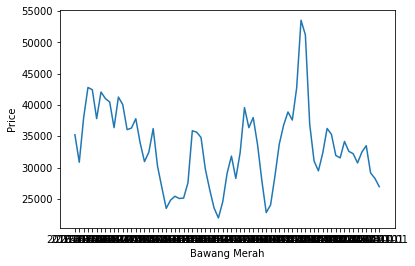

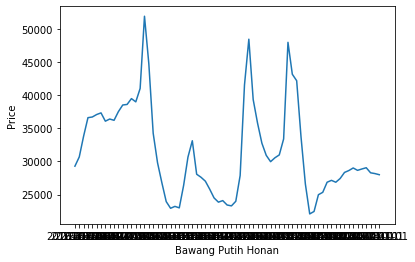

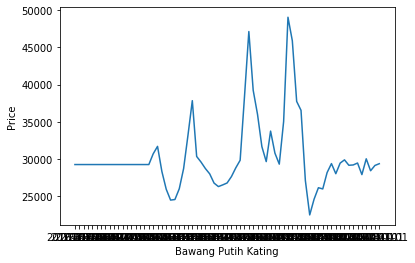

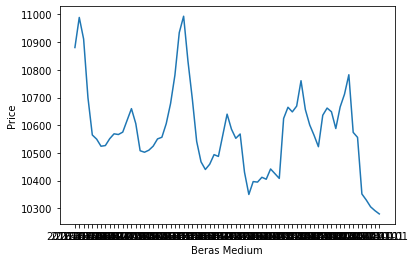

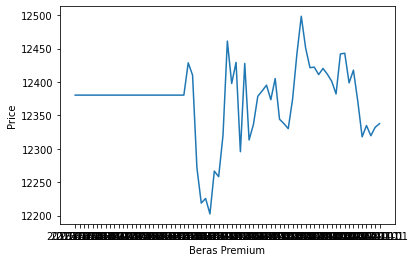

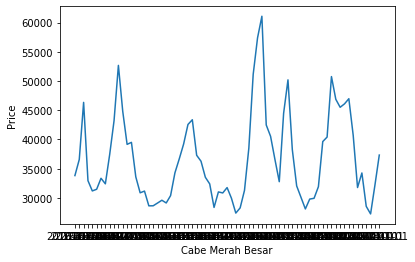

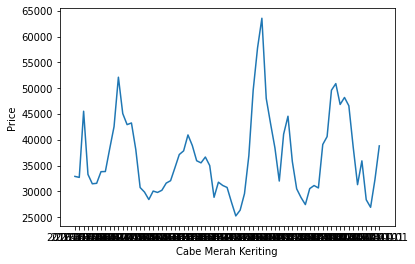

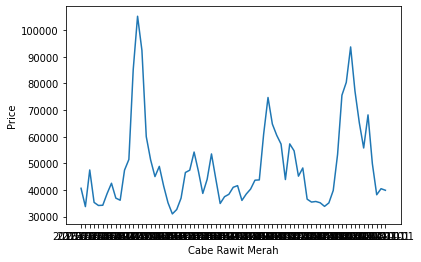

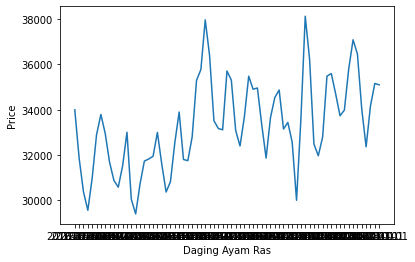

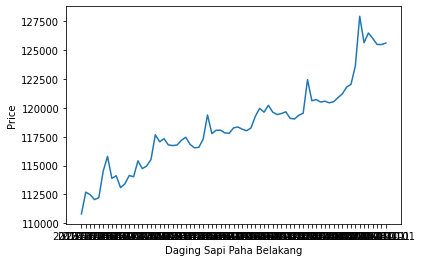

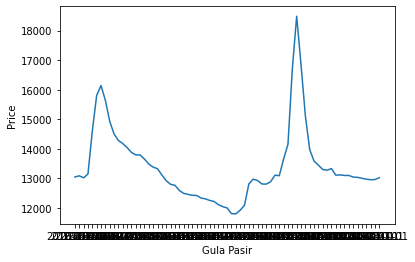

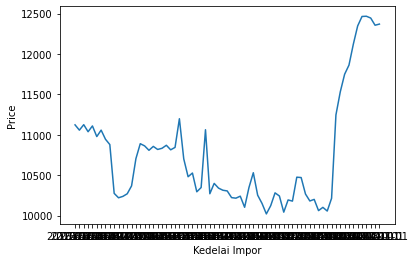

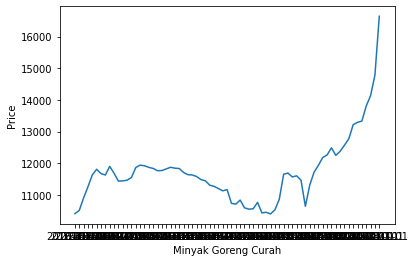

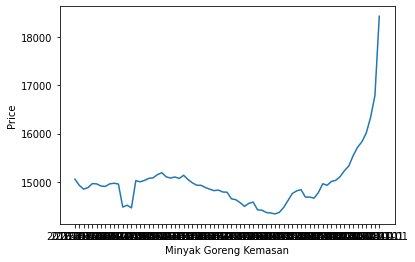

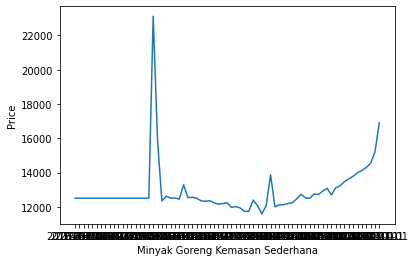

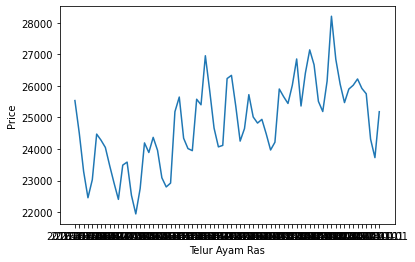

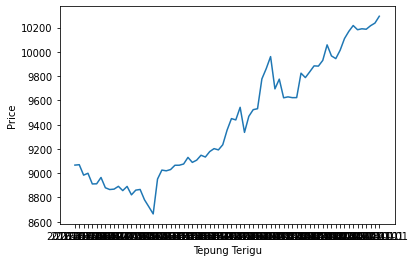

In [14]:
# create line graph
for i in price_cols:
  x = nat_cp_clean[date_cols]
  y = nat_cp_clean.loc[:, i]
  plt.plot(x, y)
  plt.ylabel('Price')
  plt.xlabel(i)
  plt.show()

In [15]:
# to csv
path = '/content/drive/MyDrive/data_anal_project/comodity_prices/ready_file/'
nat_cp_clean.to_csv(path+'national_2016-2021_clean.csv', index=False, encoding='utf-8')